In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.metrics import confusion_matrix
from tensorflow import keras

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential, clone_model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint


In [20]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices thru One-hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

print(x_train.dtype)
print(x_train.ndim)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
float32
4


In [22]:
from keras.backend import clear_session
clear_session()

In [20]:
# DEFINE the Model

input_shape = (32, 32, 3)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #layers.Conv2D(64, kernel_size=(3, 3), activation="relu",),
        #layers.Conv2D(64, kernel_size=(3, 3), activation="relu",),        
        
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),    
        layers.BatchNormalization(),                                      # BatchNorm after Conv layer """
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer        
        layers.BatchNormalization(),                                      # BatchNorm after Conv layer
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu", padding='same'),  # Added Extra layer
        layers.BatchNormalization(),                                      # BatchNorm after Conv layer """
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),                                      # BatchNorm after Conv layer
        layers.Dense(10, activation="softmax"),
    ]
)

In [21]:
# COMPILE the Model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

In [22]:
# DATA AUGMENTATION TO INCREASE THE TRAINING DATA BY APPLYING RANDOM TRANSFORMATION (like rotation, zooming)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,       # Rotate images up to 15 degrees
    width_shift_range=0.1,   # Horizontally shift images by 10%
    height_shift_range=0.1,  # Vertically shift images by 10%
    horizontal_flip=True,    # Randomly flip images
)

# Fit the data generator on the training data
datagen.fit(x_train)



In [ ]:
# Using the data generator when training the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=100,
                    validation_data=(x_test, y_test))

#history = model.fit(x_train, y_train, batch_size=64, epochs=100)

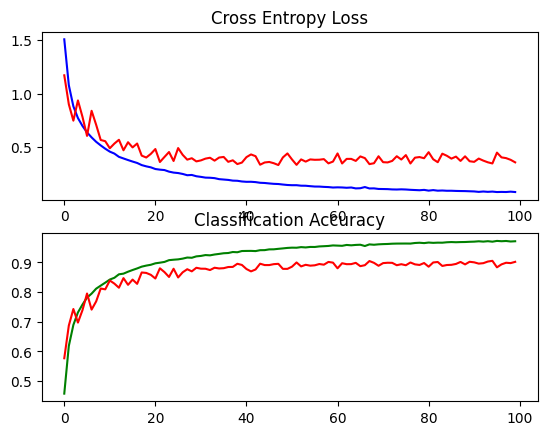

313/313 [==============================] - 1s 4ms/step - loss: 0.3579 - accuracy: 0.9022
Model Loss: 0.35794973373413086
Model Accuracy: 0.9021999835968018
313/313 [==============================] - 1s 3ms/step


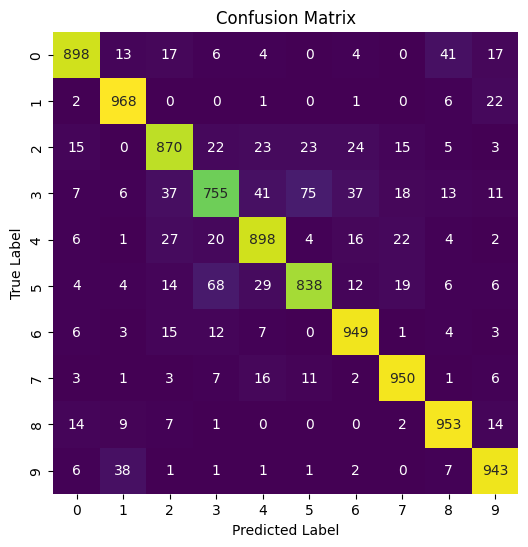

In [16]:

def evaluate_model(model, history):
    
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='val')

    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='green', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='val')
    plt.show()

    # evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('Model Loss:', test_loss)
    print('Model Accuracy:', test_acc)

    # make predictions
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_test_labels = np.argmax(y_test, axis=1)

    conf_mat = confusion_matrix(y_test_labels, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    
evaluate_model(model,history)

In [17]:
# Evaluate the model with test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3579 - accuracy: 0.9022


In [ ]:
# DISPLAY IMAGES TO SEE WHAT THE MODEL IS SEEING/PREDICTING

import numpy as np
import matplotlib.pyplot as plt

# y_test is the true labels and y_pred is the predicted labels
# Also assuing x_test contains the original images

# Get the index of images to display
num_images = 10  # Number of images to display
indices = np.random.choice(np.arange(len(y_test)), size=num_images, replace=False)

# Prepare the figure
plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices):
    plt.subplot(2, num_images // 2, i + 1)  # Create a subplot grid
    plt.imshow(x_test[idx])  # Display the image
    plt.axis('off')  # Turn off axis
    
    # Display true and predicted labels
    true_label = np.argmax(y_test[idx])  # Get the true label
    predicted_label = np.argmax(y_pred[idx])  # Get the predicted label
    plt.title(f'True: {true_label}\nPred: {predicted_label}', fontsize=10)

plt.tight_layout()
plt.show()


# USING VGG16 to Evaluate the Accuracy 
 Step1: Exclude the final classification layer and keep the other layers
 Step2: Freeze all the VGG16 Layers
 Step3: Create new layer/model on top of VGG16 model
 Step4: Compile the model
 Step5: Train the model using CIFAR10 DS from above
 Step6: Evaluate the Model

In [23]:
# USING VGG16 to Evaluate the Accuracy 

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 model pre-trained on ImageNet
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze VGG16 layers
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model on top of VGG16
model_vgg = models.Sequential([
    vgg_model,
    layers.Flatten(),
    
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dropout(0.5),
        
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),     
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model_vgg.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.00001), #Adjust learning rate
                  metrics=['accuracy'])

model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                        

In [18]:
""" # UPSIZE the image from 32*32*1 to 224*224*1 WITHOUT DATA AUGMENTATION

import tensorflow as tf

# Define a function to resize images on the fly
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224
    return image, label

# Convert the dataset to TensorFlow Dataset API and apply preprocessing
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess_image).batch(128).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess_image).batch(128).prefetch(tf.data.AUTOTUNE)

# Model training
#history = model_vgg.fit(train_ds, epochs=50, validation_data=test_ds) """

In [24]:
# UPSIZING WITH DATA AUGMENTATION

import tensorflow as tf

# Define a function to resize images on the fly that includes Data augmentation function
def preprocess_image(image, label, augment=False):
    # Resize to 224x224
    image = tf.image.resize(image, (224, 224))  

    # Include Data augmentation steps below. After resizing and before picking the next batch
    if augment:
        # Apply random flipping
        image = tf.image.random_flip_left_right(image)
        # Apply random contrast adjustment
        image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
        # Apply random rotation (e.g., 20 degrees)
        image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
                               
    return image, label


# Convert the training dataset to TensorFlow Dataset API and apply augmentation + preprocessing
# Resizing done in batches of 32 instead of whole DS, leading to memory crash, Prefetch loads the next set while the current batch is in progress.
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(lambda x, y: preprocess_image(x, y, augment=True)).batch(128).prefetch(tf.data.AUTOTUNE)

# Convert the test dataset and apply only preprocessing (no augmentation)
# Resizing done in batches of 32 instead of whole DS, leading to memory crash, Prefetch loads the next set while the current batch is in progress.
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(lambda x, y: preprocess_image(x, y, augment=False)).batch(128).prefetch(tf.data.AUTOTUNE)

# Model training
#history = model_vgg.fit(train_ds, epochs=3, validation_data=test_ds) # INCLUDED IN THE NEXT CELL!!!


In [11]:
# Add ModelCheckpoint callback to save the best model during training
checkpoint = ModelCheckpoint(
    'best_model_vgg16.h5',  # File to save the model
    monitor='val_accuracy',  # Save based on validation accuracy
    save_best_only=True,     # Only save the model if it improves
    mode='max',              # We want to maximize accuracy
    verbose=1
)

# Train the model
history = model_vgg.fit(
    train_ds, 
    epochs=50, 
    validation_data=test_ds, 
    callbacks=[checkpoint]
)

# Save the entire model at the end
model_vgg.save('vgg16_cifar10_final.h5')


Epoch 1/50


2024-09-26 21:52:04.061918: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-09-26 21:52:11.288811: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fbad0734400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-26 21:52:11.288979: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2024-09-26 21:52:11.293862: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1727387531.379125      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 [==============================] - ETA: 0s - loss: 3.0091 - accuracy: 0.1950
Epoch 1: val_accuracy improved from -inf to 0.36190, saving model to best_model_vgg16.h5


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


391/391 [==============================] - 78s 172ms/step - loss: 3.0091 - accuracy: 0.1950 - val_loss: 1.8269 - val_accuracy: 0.3619
Epoch 2/50
391/391 [==============================] - ETA: 0s - loss: 2.5492 - accuracy: 0.2726
Epoch 2: val_accuracy improved from 0.36190 to 0.45520, saving model to best_model_vgg16.h5
391/391 [==============================] - 74s 188ms/step - loss: 2.5492 - accuracy: 0.2726 - val_loss: 1.5694 - val_accuracy: 0.4552
Epoch 3/50
391/391 [==============================] - ETA: 0s - loss: 2.3440 - accuracy: 0.3186
Epoch 3: val_accuracy improved from 0.45520 to 0.49010, saving model to best_model_vgg16.h5
391/391 [==============================] - 74s 188ms/step - loss: 2.3440 - accuracy: 0.3186 - val_loss: 1.4715 - val_accuracy: 0.4901
Epoch 4/50
391/391 [==============================] - ETA: 0s - loss: 2.2092 - accuracy: 0.3468
Epoch 4: val_accuracy improved from 0.49010 to 0.49990, saving model to best_model_vgg16.h5
391/391 [=========================

In [ ]:
""" # Loading the saved model later for evaluation or fine-tuning
from tensorflow.keras.models import load_model
model_vgg_loaded = load_model('vgg16_cifar10_final.h5')

# Evaluate the SAVED model
score = model_vgg_loaded.evaluate(test_ds)
print(f'Test Loss: {score[0]}, Test Accuracy: {score[1]}') """

In [12]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_vgg.evaluate(test_ds)

# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

79/79 [==============================] - 10s 129ms/step - loss: 0.9873 - accuracy: 0.6540
Test Loss: 0.9873402118682861
Test Accuracy: 0.6539999842643738


79/79 [==============================] - 10s 128ms/step


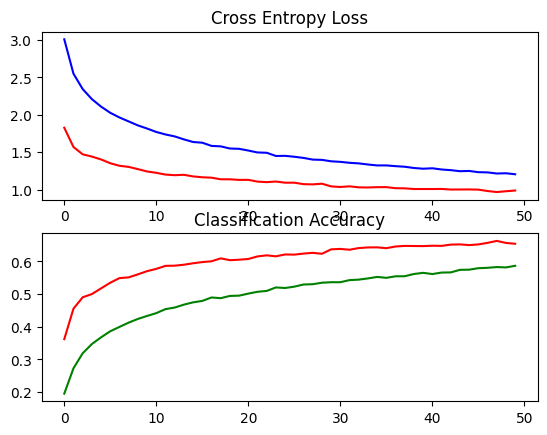

79/79 [==============================] - 10s 131ms/step - loss: 0.9873 - accuracy: 0.6540
Test Loss: 0.9873402118682861
Test Accuracy: 0.6539999842643738


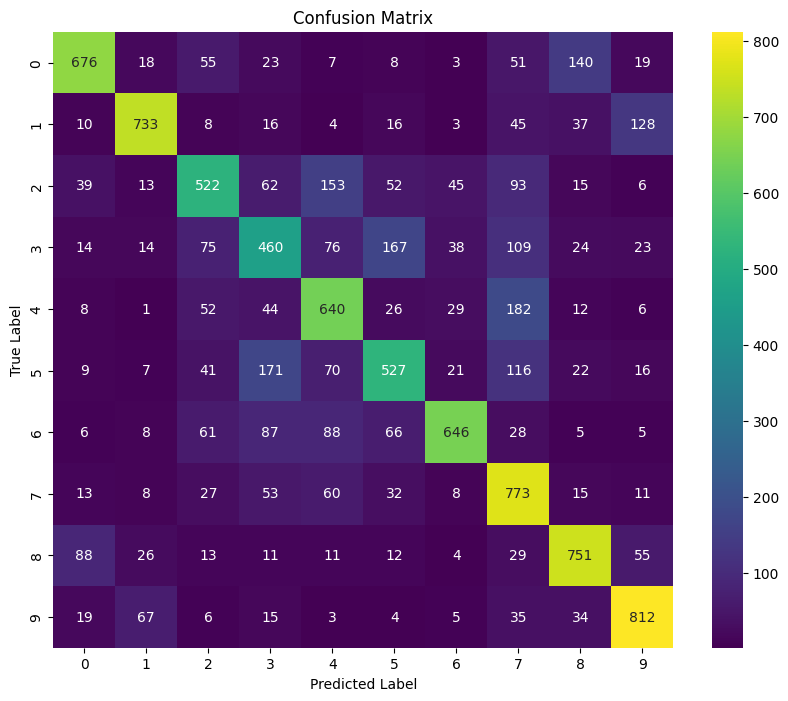

In [13]:
# Get the true labels and Make predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = model_vgg.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true_classes = np.argmax(y_true, axis=1)

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_vgg.evaluate(test_ds)
# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# TRANSFER LEARNING with VGG16
# Unfreeze the top few layers for fine-tuning
for layer in vgg_model.layers[-4:]:  # Fine-tune the last 4 layers
    layer.trainable = True

# Compile the model again with a lower learning rate
from tensorflow.keras.optimizers import Adam

model_vgg.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=.00001),  # Lower learning rate for fine-tuning
                  metrics=['accuracy'])

# Continue training (fine-tuning the top layers)
history_fine_tune = model_vgg.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

# Evaluate the fine-tuned model
score_fine_tune = model_vgg.evaluate(x_test, y_test)
print(f'Fine-tuned VGG16 Test Loss: {score_fine_tune[0]}, Test Accuracy: {score_fine_tune[1]}')



In [25]:
# FINE-TUNING of the VGG-16 Model Integration


# Unfreeze the top layers for fine-tuning
for layer in vgg_model.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True


In [26]:
# COMPILE the Model

from tensorflow.keras.optimizers import Adam

# Compile with a lower learning rate
model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate
    metrics=['accuracy']
)


In [27]:
# FIT the Model

history_fine_tune = model_vgg.fit(
    train_ds,                   # Your training dataset
    validation_data=test_ds,    # Your test dataset
    epochs=30,                  # Fine-tune for a few epochs, starting with 10 and then will try 20
    batch_size=128              # Adjust batch size as needed, starting with 128 will adjust to 64
)

Epoch 1/30
391/391 [==============================] - 58s 142ms/step - loss: 2.9011 - accuracy: 0.2088 - val_loss: 1.6463 - val_accuracy: 0.4169
Epoch 2/30
391/391 [==============================] - 56s 144ms/step - loss: 2.2792 - accuracy: 0.3277 - val_loss: 1.4134 - val_accuracy: 0.5158
Epoch 3/30
391/391 [==============================] - 67s 171ms/step - loss: 2.0061 - accuracy: 0.3935 - val_loss: 1.2923 - val_accuracy: 0.5583
Epoch 4/30
391/391 [==============================] - 56s 144ms/step - loss: 1.8236 - accuracy: 0.4388 - val_loss: 1.2587 - val_accuracy: 0.5763
Epoch 5/30
391/391 [==============================] - 57s 145ms/step - loss: 1.6929 - accuracy: 0.4712 - val_loss: 1.1147 - val_accuracy: 0.6153
Epoch 6/30
391/391 [==============================] - 57s 145ms/step - loss: 1.5995 - accuracy: 0.4959 - val_loss: 1.1244 - val_accuracy: 0.6179
Epoch 7/30
391/391 [==============================] - 57s 145ms/step - loss: 1.5146 - accuracy: 0.5171 - val_loss: 1.0430 - val_ac

In [28]:
# EVALUATE the Fine-tuned Model

score_fine_tune = model_vgg.evaluate(test_ds)
print(f'Fine-tuned VGG16 Test Loss: {score_fine_tune[0]}, Test Accuracy: {score_fine_tune[1]}')

79/79 [==============================] - 10s 130ms/step - loss: 0.8361 - accuracy: 0.7198
Fine-tuned VGG16 Test Loss: 0.836052656173706, Test Accuracy: 0.7197999954223633


79/79 [==============================] - 10s 128ms/step


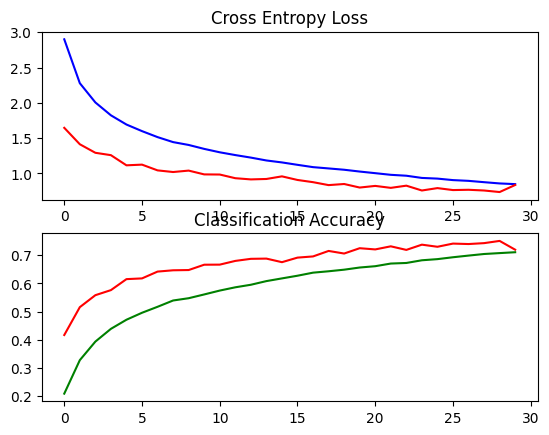

79/79 [==============================] - 10s 129ms/step - loss: 0.8361 - accuracy: 0.7198
Test Loss: 0.836052656173706
Test Accuracy: 0.7197999954223633


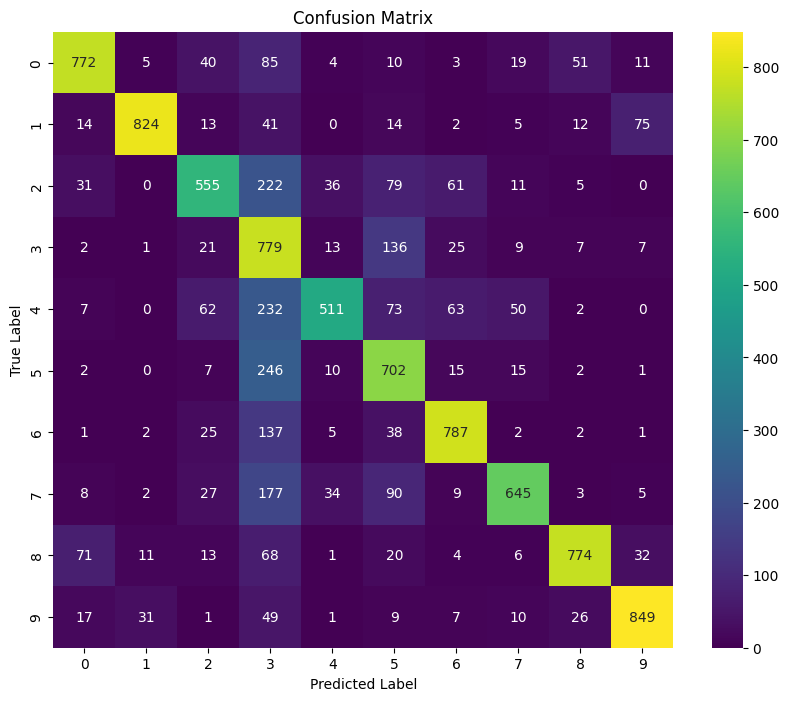

In [29]:
# Get the true labels and Make predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = model_vgg.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions
y_true_classes = np.argmax(y_true, axis=1)

# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history_fine_tune.history['loss'], color='blue', label='train')
plt.plot(history_fine_tune.history['val_loss'], color='red', label='val')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history_fine_tune.history['accuracy'], color='green', label='train')
plt.plot(history_fine_tune.history['val_accuracy'], color='red', label='val')
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_vgg.evaluate(test_ds)
# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()